In [19]:
%matplotlib inline
import numpy as np
import scipy.signal as sig
from scipy.io import wavfile
import matplotlib.pyplot as plt

import cv2
import os

In [27]:
file_path = r"path to .wav file"

filename = "filename"

In [28]:
#read data from file
fs, data = wavfile.read(file_path)

print(f"File sample rate: {fs} [Hz]")

File sample rate: 11025 [Hz]


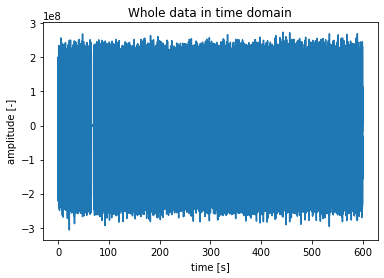

In [29]:
time = np.arange(0,len(data),1)
time = time*(1/fs)


        
plt.plot(time,data)
plt.xlabel('time [s]')
plt.ylabel('amplitude [-]')
plt.title('Whole data in time domain')
plt.show()

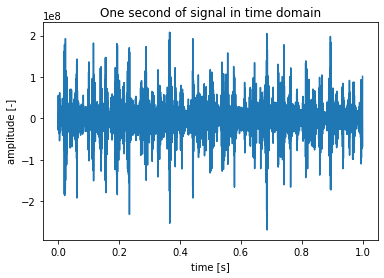

In [30]:
#one second of measured signal in time domain

batch = data[100000:(100000+fs)]
batch_len = len(batch)
t = np.arange(0,batch_len)
t = t / batch_len

plt.plot(t,batch)
plt.xlabel('time [s]')
plt.ylabel('amplitude [-]')
plt.title('One second of signal in time domain')
plt.show()

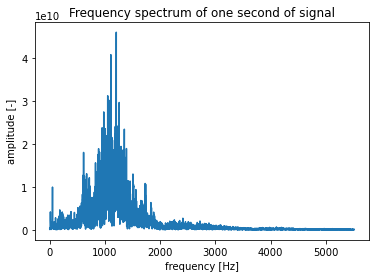

In [31]:
#frequency spectrum of one second of signal
freq_spectrum = np.abs(np.fft.rfft(batch))
f = np.fft.rfftfreq(len(batch), 1/fs)

plt.plot(f,freq_spectrum)
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude [-]')
plt.title('Frequency spectrum of one second of signal')
plt.show()

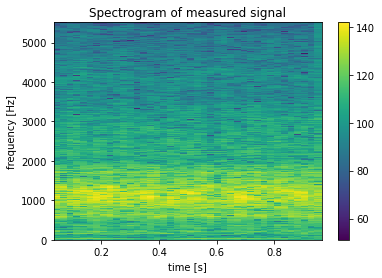

In [34]:
#frequency spectrum of one second of signal

f, t, Sxx = sig.spectrogram(batch, fs=fs, window=np.hamming(window_width), nperseg=window_width, noverlap=0.75*window_width, 
                                scaling='spectrum', mode='magnitude')
plt.pcolormesh(t, f, 20 * np.log10(Sxx),shading = 'auto')
plt.xlabel('time [s]')
plt.ylabel('frequency [Hz]')
plt.title('Spectrogram of measured signal')
plt.ylim(0, fs/2)
#uncomment if u want to set limits on colorbar
#plt.clim(-60,0)
plt.colorbar()
plt.show()

In [25]:
#spectrogram

window_width = 1024

#parametrs needed to crop axes from image
h = 904 #height of crop
w = 1114 #width of crop
x = 226 #first x of crop
y = 144 #first y of crop

numel = len(data) #length of measurement file

batch = data[0:fs] #first batch for loop

max_loop = (numel)//fs

for i in range(0,max_loop):
    f, t, Sxx = sig.spectrogram(batch, fs=fs, window=np.hamming(window_width), nperseg=window_width, noverlap=0.75*window_width, 
                                scaling='spectrum', mode='magnitude')
    plt.pcolormesh(t, f, 20 * np.log10(Sxx),shading = 'auto')
    plt.xlabel('czas [s]')
    plt.ylabel('częstotliwość [Hz]')
    plt.title('Spektrogram sygnału z akcelerometru')
    plt.ylim(0, fs/2)
    #plt.clim(-60,0)
    plt.colorbar()
    plt.savefig("temp.jpg",dpi=300)
    plt.close()

    #create another batch
    batch = data[fs*i:(fs*i+fs)]
    
    img = cv2.imread("temp.jpg")
    crop_img = img[y:y+h, x:x+w]
    #uncomment if you want to see every image
    #cv2.imshow("cropped", crop_img)
    
    #path to save images
    path = f"3_faults\\inner race fault\\{filename}_{i}.jpg"
    
    if cv2.imwrite(path, crop_img):
        print("img saved")
    #uncomment if you want to see every image
    #cv2.waitKey(0)

img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved


In [26]:
# x = 222 y = 144                                x = 1340 y = 144
# x = 222 y = 1048                               x = 1340 y = 1048

print(f"Total {max_loop} created.")

Total 599 created.
